In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.datasets import load_iris, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [23]:
x,y = make_classification(n_samples=300, n_features=5, n_informative=3, n_classes=2)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=34)

In [25]:
x_train.shape

(210, 5)

In [26]:
x_test.shape

(90, 5)

In [27]:
model = LogisticRegression()

In [28]:
model.fit(x_train, y_train)

LogisticRegression()

In [29]:
model.score(x_train, y_train)

0.9238095238095239

In [30]:
y_pred = model.predict(x_test)

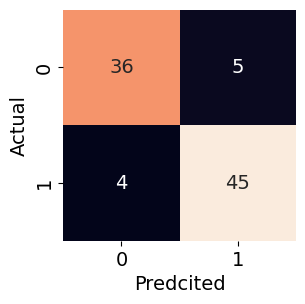

In [48]:
plt.figure(figsize=(3,3))
plt.rcParams["font.size"]=14
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False)
plt.xlabel("Predcited")
plt.ylabel("Actual")
plt.show()

In [44]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [45]:
tp, fp, fn, tn

(np.int64(45), np.int64(5), np.int64(4), np.int64(36))

In [46]:
accuracy_score(y_test, y_pred)

0.9

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        41
           1       0.90      0.92      0.91        49

    accuracy                           0.90        90
   macro avg       0.90      0.90      0.90        90
weighted avg       0.90      0.90      0.90        90



In [51]:
precision= tp/(tp+fp)
precision

np.float64(0.9)

In [53]:
recall = tp/(tp+fn)
recall

np.float64(0.9183673469387755)

In [56]:
f1_score=((2*precision*recall)/(precision+recall))
f1_score

np.float64(0.9090909090909091)

In [57]:
y_pr_prob = model.predict_proba(x_test)[:,1]

In [58]:
y_pr_prob

array([0.0017807 , 0.19911436, 0.90852753, 0.55925262, 0.01139146,
       0.86591929, 0.02054587, 0.88867107, 0.69432699, 0.1765338 ,
       0.84733253, 0.17557231, 0.99151481, 0.93147767, 0.76475643,
       0.98457634, 0.851404  , 0.28171135, 0.01640562, 0.03046245,
       0.97459006, 0.99332813, 0.02082878, 0.96929642, 0.82615248,
       0.79994973, 0.00948995, 0.89115494, 0.98012102, 0.55306008,
       0.8728925 , 0.87110126, 0.24250201, 0.04161526, 0.16923414,
       0.09325331, 0.68659796, 0.35127216, 0.95347262, 0.99010497,
       0.94989602, 0.99584282, 0.98499799, 0.98446675, 0.00720463,
       0.03254703, 0.97807214, 0.78549601, 0.9990945 , 0.15577641,
       0.98652736, 0.03862756, 0.97831076, 0.99756395, 0.98555963,
       0.00638044, 0.03626668, 0.35093461, 0.01996893, 0.40556484,
       0.01431041, 0.02100228, 0.84522555, 0.00574928, 0.33715555,
       0.7331683 , 0.92431668, 0.73534292, 0.86717216, 0.05492219,
       0.83563126, 0.0196686 , 0.56281356, 0.99536221, 0.12990

In [59]:
fpr, tpr, threshold = roc_curve(y_test, y_pr_prob)

In [62]:
fpr, tpr, threshold

(array([0.        , 0.        , 0.        , 0.02439024, 0.02439024,
        0.04878049, 0.04878049, 0.07317073, 0.07317073, 0.09756098,
        0.09756098, 0.17073171, 0.17073171, 0.2195122 , 0.2195122 ,
        0.29268293, 0.29268293, 1.        ]),
 array([0.        , 0.02040816, 0.20408163, 0.20408163, 0.40816327,
        0.40816327, 0.7755102 , 0.7755102 , 0.89795918, 0.89795918,
        0.91836735, 0.91836735, 0.93877551, 0.93877551, 0.97959184,
        0.97959184, 1.        , 1.        ]),
 array([       inf, 0.9990945 , 0.98700913, 0.98652736, 0.96929642,
        0.95347262, 0.78549601, 0.76475643, 0.66551552, 0.56281356,
        0.55925262, 0.35127216, 0.35093461, 0.28171135, 0.19911436,
        0.16923414, 0.15577641, 0.0017807 ]))

In [63]:
auc_score= auc(fpr, tpr)
auc_score

np.float64(0.9477351916376306)

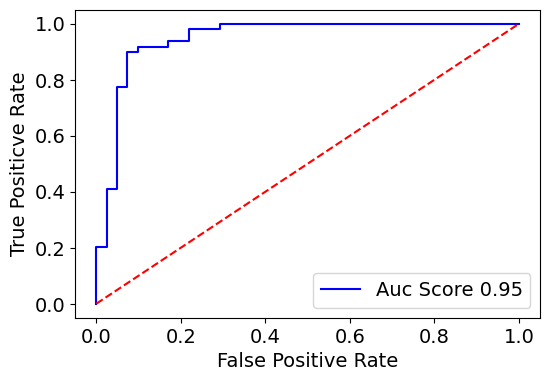

In [71]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", label=f"Auc Score {np.round(auc_score, 2)}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positicve Rate")
plt.plot([0,1],[0,1], color="red", ls="--")
plt.legend()
plt.show()

In [86]:
dt_model = DecisionTreeClassifier(max_depth=2)

In [87]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [88]:
dt_y_pred = dt_model.predict(x_test)

In [89]:
dt_y_pred_prob = dt_model.predict_proba(x_test)[:,1]

In [90]:
dt_y_pred_prob

array([0.07017544, 0.07017544, 0.96551724, 0.875     , 0.07017544,
       0.96551724, 0.07017544, 0.96551724, 0.07017544, 0.07017544,
       0.875     , 0.07017544, 0.96551724, 0.96551724, 0.96551724,
       0.96551724, 0.96551724, 0.07017544, 0.875     , 0.07017544,
       0.96551724, 0.96551724, 0.07017544, 0.96551724, 0.96551724,
       0.96551724, 0.07017544, 0.96551724, 0.96551724, 0.07017544,
       0.96551724, 0.96551724, 0.875     , 0.07017544, 0.07017544,
       0.07017544, 0.07017544, 0.07017544, 0.96551724, 0.96551724,
       0.96551724, 0.96551724, 0.96551724, 0.96551724, 0.07017544,
       0.875     , 0.96551724, 0.96551724, 0.96551724, 0.07017544,
       0.96551724, 0.07017544, 0.96551724, 0.96551724, 0.96551724,
       0.07017544, 0.07017544, 0.96551724, 0.07017544, 0.07017544,
       0.07017544, 0.07017544, 0.96551724, 0.07017544, 0.07017544,
       0.96551724, 0.96551724, 0.96551724, 0.96551724, 0.07017544,
       0.96551724, 0.875     , 0.07017544, 0.96551724, 0.07017

In [91]:
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_test, dt_y_pred_prob)

In [92]:
dt_auc = auc(dt_fpr, dt_tpr)

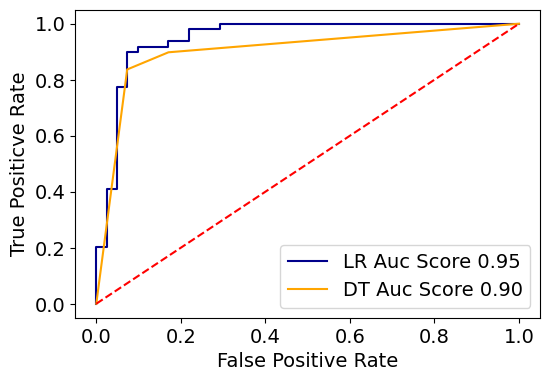

In [93]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="darkblue", label=f"LR Auc Score {np.round(auc_score, 2)}")
plt.plot(dt_fpr, dt_tpr, color="orange", label= f"DT Auc Score {dt_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positicve Rate")
plt.plot([0,1],[0,1], color="red", ls="--")
plt.legend()
plt.show()